## Importing Essential Libraries

In [53]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error

## Reading the CSV files 
### 'X1.csv' contains data of all the factors affecting the Rice Yield
### 'y1.csv' contains the Rice Yield

In [54]:
X = pd.read_csv('../input/agro-data/X1.csv',header=0)
y = pd.read_csv('../input/agro-data/y1.csv',header=0)
y = y.iloc[:, 0]
datas = X

## Preprocessing the data using StandardScalar Scikit learn
> https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [55]:
from sklearn import preprocessing
x = X.values #returns a numpy array
scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(x)
X = pd.DataFrame(x_scaled)
X.columns = datas.columns[0:27]

### Deleting Either of the Average rainfall or Annual rainfall

In [56]:
del X['avg_rain']
# del X['ANNUAL']

## Splitting the Data into Training and Testing for validation using train_test_split
> https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [58]:
print(X_train.shape)
print(X_test.shape)

(2028, 20)
(508, 20)


## Implementation of Ridge Regression from Scratch with hyperparameter tuning

#### Hyperparameter tuning for Ridge Regression

In [59]:

# def predict(X):
#     return X.dot(W) + b

# param_range= range(-10,100)
# best = 1000
# j=0
# # param_range=np.logspace(1,4,100)
# # param_range=int(param_range)
# for i in param_range:
#     print(i)

#     pred = model.predict(X_test) 
#     error = sqrt(mean_squared_error(pred,y_test))
#     if(error<best):
#         best=error
#         j=i

    # # Train Data
    # X = X_train
    # Y = y_train

    # # Hyperparameters
    # learn_rate  = 0.2848035868435802      
    # iterations = 17       
    # L2Penalty = 13

    # # Ridge Regression Model 
    # m,n = X.shape
    # W = np.zeros(n)
    # b=0
    # # fitting 
    # for i in range(iterations):
    #     Y_pred = X.dot( W ) + b

    #     dW =   ( - ( 2 * ( X.T ).dot( Y - Y_pred ) ) +               
    #                ( 2 * l2_penality * W ) ) / m; 
    #     db = - 2 * np.sum( Y - Y_pred ) / m 

    #     W = W - learning_rate * dW    
    #     b = b - learning_rate * db

### Ridge Regression with best set of hyperparameters

In [60]:
def predict(X):
    return X.dot(W) + b

# Train Data
X = X_train
Y = y_train

# Hyperparameters
learn_rate  = 0.2848035868435802      
iterations = 17       
L2Penalty = 13

# Ridge Regression Model 
a,c = X.shape
Weights = np.zeros(n)
b=0
# fitting 
for i in range(iterations):
    Y_pred = X.dot( Weights ) + b
    dW =   ( - ( 2 * ( X.T ).dot( Y - Y_pred ) ) +               
               ( 2 * L2Penalty * Weights ) ) / a; 
    db = - 2 * np.sum( Y - Y_pred ) / a 
    Weights = Weights - learn_rate * dW    
    b = b - learn_rate * db

## Calculations for Testing and Training Mean Squared Error

In [61]:
# Calculating the testing error
pred = predict(X_test)
error = sqrt(mean_squared_error(pred,y_test))
print("Testing error: ",error)

# Calculating the training error
pred_train = predict(X_train)
train_error = sqrt(mean_squared_error(pred_train,y_train))
print("Training error: ", train_error)

Testing error:  579.5211993555529
Training error:  607.6989792488598


#### Plotting the Predictions and the Ground Truth for Testing Data

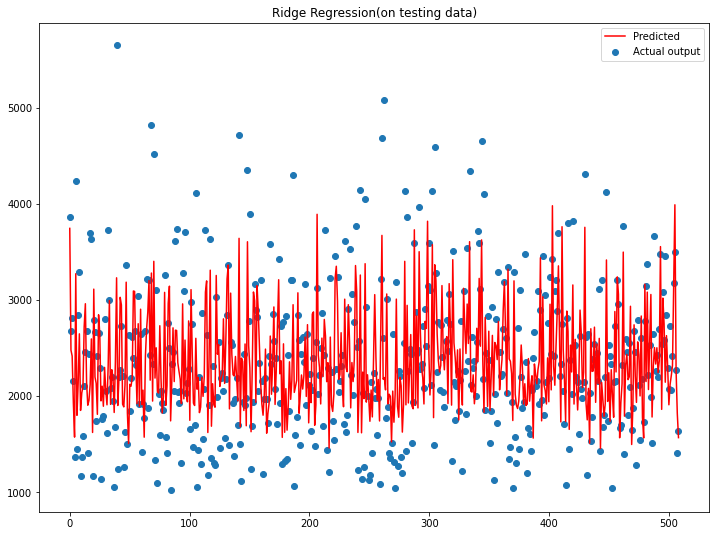

In [62]:
xl = np.linspace(0,508,508);
fig, (ax) = plt.subplots(1, 1 , figsize=(12,9))
ax.scatter(xl,y_test,label='Actual output')
ax.plot(xl,pred,color='red',label = 'Predicted')
plt.title('Ridge Regression(on testing data)')
leg = ax.legend();

#### Plotting the Predictions and the Ground Truth for Training Data

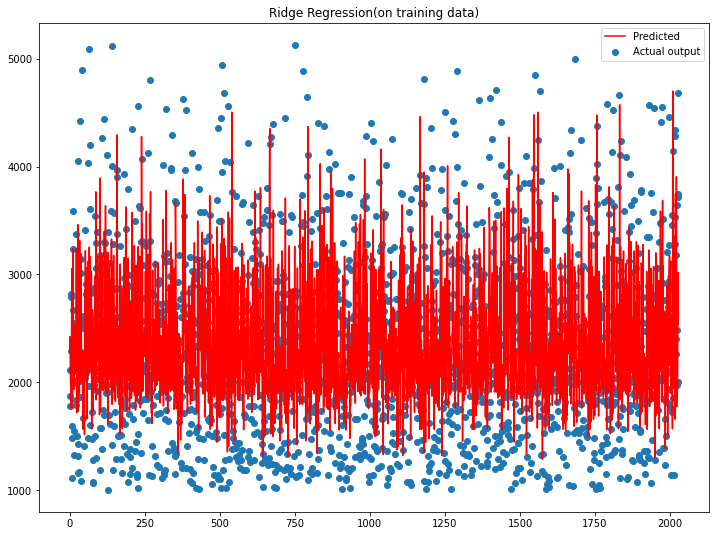

In [63]:
xl = np.linspace(0,2028,2028);
fig, (ax) = plt.subplots(1, 1 , figsize=(12,9))
ax.scatter(xl,y_train,label='Actual output')
ax.plot(xl,pred_train,color='red',label = 'Predicted')
plt.title('Ridge Regression(on training data)')
leg = ax.legend();